## Does fixing biases induce a consistent ordering in neural net filters?

We take the first layer bias terms from a converged 2-layer network and order them.
Now, we initialize two new networks from scratch, but set their biases to be fixed to the bias vector of the pre-trained network.

Does this induce some consistent ordering -- if the biases of two networks are fixed and identical, would the filters also look similar?

In [2]:
# setup
import os
import torch
import torchvision
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
# local utils
# !find . -name \*.pyc -delete
from vis_utils import *
from model_def import *
from model_train import *

%matplotlib inline


In [4]:
# setup and load CIFAR dataset
batchSize = 100
trainloader, testloader, classes = setup_cifar_data_mlp(batchSize)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
# create a fully-connected network with ReLU non-linearities
net = MLP(input_dim=3072, fc1_dim=500, fc2_dim=100)
print(net)  # dispay the network architecture

MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)


In [6]:
# Load pre-trained network
net.load_state_dict(torch.load(os.path.join('./data', 'cifar-MLP_v6.0.5', 'net-trained.dat')))
net.cpu()



MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)

<Container object of 500 artists>

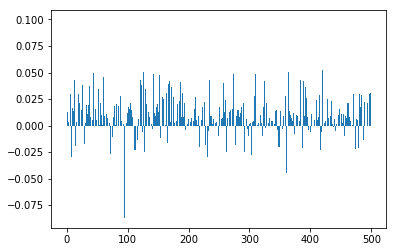

In [7]:
# get the original bias vector
bias_orig = net.fc1.bias
plt.bar(range(len(bias_orig)), bias_orig.data.numpy())

<Container object of 500 artists>

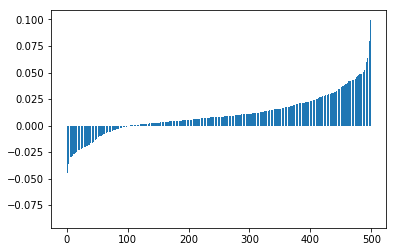

In [8]:
# Order the bias terms
(sorted_bias, sorted_indices)  = bias_orig.sort()
plt.bar(range(len(sorted_bias)), sorted_bias.data.numpy())

### Net 1 - fix biases

We create a new network and set its bias terms to the "sorted bias" obtained earlier.


In [9]:
# new net and set biases
net = MLP(input_dim=3072, fc1_dim=500, fc2_dim=100)
net.fc1.bias = nn.Parameter(sorted_bias.data)

<Container object of 500 artists>

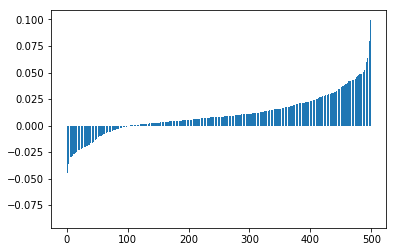

In [10]:
# sanity-check: plot the network's bias tensor
plt.bar(range(len(net.fc1.bias)), net.fc1.bias.data.numpy())

In [11]:
net.fc1.bias.requires_grad = False
net.cuda()

MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)

In [13]:
# sanity-cehck: see that bias has False grad
net.fc1.bias.requires_grad

False

In [12]:

from torch.optim.lr_scheduler import StepLR
import json

# hyper-params
useGpu = True
seed = 0  # for repeatable results
modelPath = []
numEpochs = 5
learningRate = 0.03
numBatchesPerEpoch = len(trainloader.dataset) // batchSize 
momentum = 0.9
weight_decay = 0.018 # pretty high L2-regularization (smaller generalization gap, smoother-looking filters)
gamma = 0.9 # decrement learning rate by this factor at every epoch
verboseFrequency = 50


# save training config
cfg = {'useGpu': useGpu, 'numEpochs': numEpochs, 'learningRate': learningRate, \
       'batchSize': batchSize, 'momentum': momentum, 'weight_decay': weight_decay, \
       'gamma': gamma, 'verboseFrequency': verboseFrequency, 'doVisFilter': False}


# set random seed
torch.default_generator.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Define a Loss function
criterion = nn.CrossEntropyLoss()


NameError: name 'optimizer' is not defined

In [14]:


optimizer = optim.SGD(filter(lambda p: p.requires_grad, net.parameters()), lr=learningRate, momentum=momentum, weight_decay=weight_decay)






# lr_scheduler = optim.lr_scheduler.StepLR(optimizer, 1, gamma=gamma)

In [21]:
expName = 'cifar-MLP_fixbias-0' # MLP - w1:500, w2:100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

# Train the network
train_cifar_net(net, trainloader, testloader, criterion, optimizer, \
                expDir, batchSize=batchSize, \
                numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], \
                verboseFrequency=verboseFrequency, \
                doVisFilter=False)



  0%|          | 0/5 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 2.086 accu: 0.264 lr: 0.030000
epoch:   0 batch:   100 loss: 1.808 accu: 0.368 lr: 0.030000
epoch:   0 batch:   150 loss: 1.768 accu: 0.380 lr: 0.030000
epoch:   0 batch:   200 loss: 1.746 accu: 0.391 lr: 0.030000
epoch:   0 batch:   250 loss: 1.724 accu: 0.398 lr: 0.030000
epoch:   0 batch:   300 loss: 1.705 accu: 0.405 lr: 0.030000
epoch:   0 batch:   350 loss: 1.695 accu: 0.419 lr: 0.030000
epoch:   0 batch:   400 loss: 1.659 accu: 0.433 lr: 0.030000
epoch:   0 batch:   450 loss: 1.663 accu: 0.418 lr: 0.030000
epoch:   0 batch:   500 loss: 1.710 accu: 0.414 lr: 0.030000


 20%|██        | 1/5 [00:14<00:58, 14.61s/it]

epoch:   1 batch:    50 loss: 1.645 accu: 0.433 lr: 0.030000
epoch:   1 batch:   100 loss: 1.640 accu: 0.430 lr: 0.030000
epoch:   1 batch:   150 loss: 1.649 accu: 0.432 lr: 0.030000
epoch:   1 batch:   200 loss: 1.654 accu: 0.431 lr: 0.030000
epoch:   1 batch:   250 loss: 1.666 accu: 0.429 lr: 0.030000
epoch:   1 batch:   300 loss: 1.672 accu: 0.438 lr: 0.030000
epoch:   1 batch:   350 loss: 1.643 accu: 0.429 lr: 0.030000
epoch:   1 batch:   400 loss: 1.638 accu: 0.438 lr: 0.030000
epoch:   1 batch:   450 loss: 1.649 accu: 0.434 lr: 0.030000
epoch:   1 batch:   500 loss: 1.647 accu: 0.428 lr: 0.030000


 40%|████      | 2/5 [00:26<00:41, 13.92s/it]

epoch:   2 batch:    50 loss: 1.629 accu: 0.449 lr: 0.030000
epoch:   2 batch:   100 loss: 1.615 accu: 0.447 lr: 0.030000
epoch:   2 batch:   150 loss: 1.654 accu: 0.426 lr: 0.030000
epoch:   2 batch:   200 loss: 1.639 accu: 0.432 lr: 0.030000
epoch:   2 batch:   250 loss: 1.631 accu: 0.431 lr: 0.030000
epoch:   2 batch:   300 loss: 1.638 accu: 0.431 lr: 0.030000
epoch:   2 batch:   350 loss: 1.635 accu: 0.423 lr: 0.030000
epoch:   2 batch:   400 loss: 1.625 accu: 0.437 lr: 0.030000
epoch:   2 batch:   450 loss: 1.638 accu: 0.426 lr: 0.030000
epoch:   2 batch:   500 loss: 1.644 accu: 0.432 lr: 0.030000


 60%|██████    | 3/5 [00:38<00:26, 13.25s/it]

epoch:   3 batch:    50 loss: 1.618 accu: 0.443 lr: 0.030000
epoch:   3 batch:   100 loss: 1.612 accu: 0.441 lr: 0.030000
epoch:   3 batch:   150 loss: 1.637 accu: 0.449 lr: 0.030000
epoch:   3 batch:   200 loss: 1.608 accu: 0.449 lr: 0.030000
epoch:   3 batch:   250 loss: 1.620 accu: 0.446 lr: 0.030000
epoch:   3 batch:   300 loss: 1.637 accu: 0.447 lr: 0.030000
epoch:   3 batch:   350 loss: 1.623 accu: 0.449 lr: 0.030000
epoch:   3 batch:   400 loss: 1.608 accu: 0.445 lr: 0.030000
epoch:   3 batch:   450 loss: 1.628 accu: 0.450 lr: 0.030000
epoch:   3 batch:   500 loss: 1.614 accu: 0.455 lr: 0.030000


 80%|████████  | 4/5 [00:51<00:13, 13.11s/it]

epoch:   4 batch:    50 loss: 1.607 accu: 0.458 lr: 0.030000
epoch:   4 batch:   100 loss: 1.614 accu: 0.446 lr: 0.030000
epoch:   4 batch:   150 loss: 1.623 accu: 0.439 lr: 0.030000
epoch:   4 batch:   200 loss: 1.649 accu: 0.434 lr: 0.030000
epoch:   4 batch:   250 loss: 1.644 accu: 0.432 lr: 0.030000
epoch:   4 batch:   300 loss: 1.606 accu: 0.461 lr: 0.030000
epoch:   4 batch:   350 loss: 1.630 accu: 0.433 lr: 0.030000
epoch:   4 batch:   400 loss: 1.619 accu: 0.450 lr: 0.030000
epoch:   4 batch:   450 loss: 1.610 accu: 0.444 lr: 0.030000
epoch:   4 batch:   500 loss: 1.605 accu: 0.452 lr: 0.030000


100%|██████████| 5/5 [01:05<00:00, 13.28s/it]

Finished Training


<Container object of 500 artists>

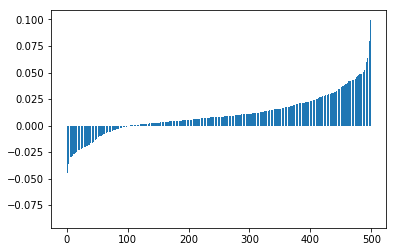

In [22]:
# sanity-check: plot the network's bias tensor
plt.bar(range(len(net.fc1.bias)), net.fc1.bias.data.numpy())

(500, 3072)


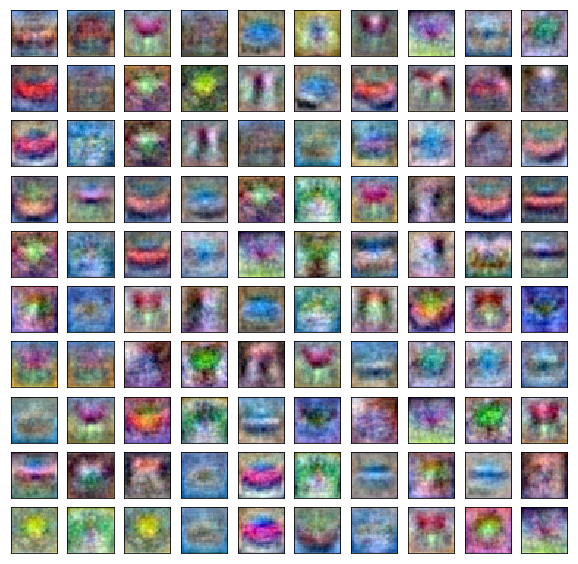

In [23]:
# Visualize the first layer filters (this tiles the first 100 filters in a 10x10 grid)
# -- a large number of duplicates are easily observed by visual inspection
fc1Params = list(net.fc1.parameters())
w = fc1Params[0].data.numpy()
print w.shape

f = vis_linear_weights(w)
f.savefig(os.path.join(expDir,'mlp-filter-0.png'), bbox_inches='tight')

## Net 2

In [24]:
# new net and set biases
net2 = MLP(input_dim=3072, fc1_dim=500, fc2_dim=100)
net2.fc1.bias = nn.Parameter(sorted_bias.data)

In [25]:
net2.fc1.bias.requires_grad = False
net2.cuda()

MLP (
  (fc1): Linear (3072 -> 500)
  (fc2): Linear (500 -> 100)
  (fc3): Linear (100 -> 10)
)

In [26]:
optimizer = optim.SGD(filter(lambda p: p.requires_grad, net2.parameters()), lr=learningRate, momentum=momentum, weight_decay=weight_decay)

In [27]:
expName = 'cifar-MLP_fixbias-1' # MLP - w1:500, w2:100

# create experiment folder
expDir = os.path.join('./data', expName)
if not os.path.exists(expDir):
    os.makedirs(expDir)

# Train the network
train_cifar_net(net2, trainloader, testloader, criterion, optimizer, \
                expDir, batchSize=batchSize, \
                numEpochs=numEpochs, useGpu=useGpu, fixFilterList=[], \
                verboseFrequency=verboseFrequency, \
                doVisFilter=False)

  0%|          | 0/5 [00:00<?, ?it/s]

epoch:   0 batch:    50 loss: 2.089 accu: 0.257 lr: 0.030000
epoch:   0 batch:   100 loss: 1.826 accu: 0.362 lr: 0.030000
epoch:   0 batch:   150 loss: 1.777 accu: 0.361 lr: 0.030000
epoch:   0 batch:   200 loss: 1.745 accu: 0.393 lr: 0.030000
epoch:   0 batch:   250 loss: 1.717 accu: 0.396 lr: 0.030000
epoch:   0 batch:   300 loss: 1.689 accu: 0.422 lr: 0.030000
epoch:   0 batch:   350 loss: 1.689 accu: 0.418 lr: 0.030000
epoch:   0 batch:   400 loss: 1.678 accu: 0.418 lr: 0.030000
epoch:   0 batch:   450 loss: 1.694 accu: 0.417 lr: 0.030000
epoch:   0 batch:   500 loss: 1.673 accu: 0.429 lr: 0.030000


 20%|██        | 1/5 [00:13<00:53, 13.47s/it]

epoch:   1 batch:    50 loss: 1.626 accu: 0.445 lr: 0.030000
epoch:   1 batch:   100 loss: 1.656 accu: 0.425 lr: 0.030000
epoch:   1 batch:   150 loss: 1.648 accu: 0.429 lr: 0.030000
epoch:   1 batch:   200 loss: 1.657 accu: 0.431 lr: 0.030000
epoch:   1 batch:   250 loss: 1.640 accu: 0.436 lr: 0.030000
epoch:   1 batch:   300 loss: 1.634 accu: 0.442 lr: 0.030000
epoch:   1 batch:   350 loss: 1.631 accu: 0.444 lr: 0.030000
epoch:   1 batch:   400 loss: 1.661 accu: 0.440 lr: 0.030000
epoch:   1 batch:   450 loss: 1.649 accu: 0.432 lr: 0.030000
epoch:   1 batch:   500 loss: 1.639 accu: 0.433 lr: 0.030000


 40%|████      | 2/5 [00:26<00:39, 13.29s/it]

epoch:   2 batch:    50 loss: 1.642 accu: 0.434 lr: 0.030000
epoch:   2 batch:   100 loss: 1.606 accu: 0.449 lr: 0.030000
epoch:   2 batch:   150 loss: 1.645 accu: 0.437 lr: 0.030000
epoch:   2 batch:   200 loss: 1.623 accu: 0.447 lr: 0.030000
epoch:   2 batch:   250 loss: 1.595 accu: 0.454 lr: 0.030000
epoch:   2 batch:   300 loss: 1.630 accu: 0.442 lr: 0.030000
epoch:   2 batch:   350 loss: 1.639 accu: 0.436 lr: 0.030000
epoch:   2 batch:   400 loss: 1.636 accu: 0.432 lr: 0.030000
epoch:   2 batch:   450 loss: 1.641 accu: 0.441 lr: 0.030000
epoch:   2 batch:   500 loss: 1.632 accu: 0.433 lr: 0.030000


 60%|██████    | 3/5 [00:42<00:28, 14.09s/it]

epoch:   3 batch:    50 loss: 1.616 accu: 0.447 lr: 0.030000
epoch:   3 batch:   100 loss: 1.629 accu: 0.443 lr: 0.030000
epoch:   3 batch:   150 loss: 1.644 accu: 0.441 lr: 0.030000
epoch:   3 batch:   200 loss: 1.593 accu: 0.468 lr: 0.030000
epoch:   3 batch:   250 loss: 1.617 accu: 0.450 lr: 0.030000
epoch:   3 batch:   300 loss: 1.611 accu: 0.453 lr: 0.030000
epoch:   3 batch:   350 loss: 1.626 accu: 0.446 lr: 0.030000
epoch:   3 batch:   400 loss: 1.626 accu: 0.438 lr: 0.030000
epoch:   3 batch:   450 loss: 1.647 accu: 0.433 lr: 0.030000
epoch:   3 batch:   500 loss: 1.609 accu: 0.454 lr: 0.030000


 80%|████████  | 4/5 [00:55<00:13, 13.97s/it]

epoch:   4 batch:    50 loss: 1.591 accu: 0.462 lr: 0.030000
epoch:   4 batch:   100 loss: 1.631 accu: 0.446 lr: 0.030000
epoch:   4 batch:   150 loss: 1.606 accu: 0.446 lr: 0.030000
epoch:   4 batch:   200 loss: 1.597 accu: 0.461 lr: 0.030000
epoch:   4 batch:   250 loss: 1.627 accu: 0.445 lr: 0.030000
epoch:   4 batch:   300 loss: 1.642 accu: 0.444 lr: 0.030000
epoch:   4 batch:   350 loss: 1.634 accu: 0.437 lr: 0.030000
epoch:   4 batch:   400 loss: 1.647 accu: 0.439 lr: 0.030000
epoch:   4 batch:   450 loss: 1.624 accu: 0.443 lr: 0.030000
epoch:   4 batch:   500 loss: 1.648 accu: 0.437 lr: 0.030000


100%|██████████| 5/5 [01:10<00:00, 14.09s/it]

Finished Training


<Container object of 500 artists>

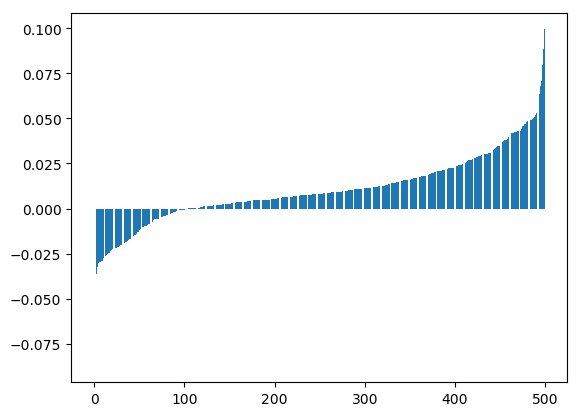

In [29]:
# NETWORK 2 -- sanity-check: plot the network's bias tensor
plt.bar(range(len(net2.fc1.bias)), net2.fc1.bias.data.numpy())

(500, 3072)


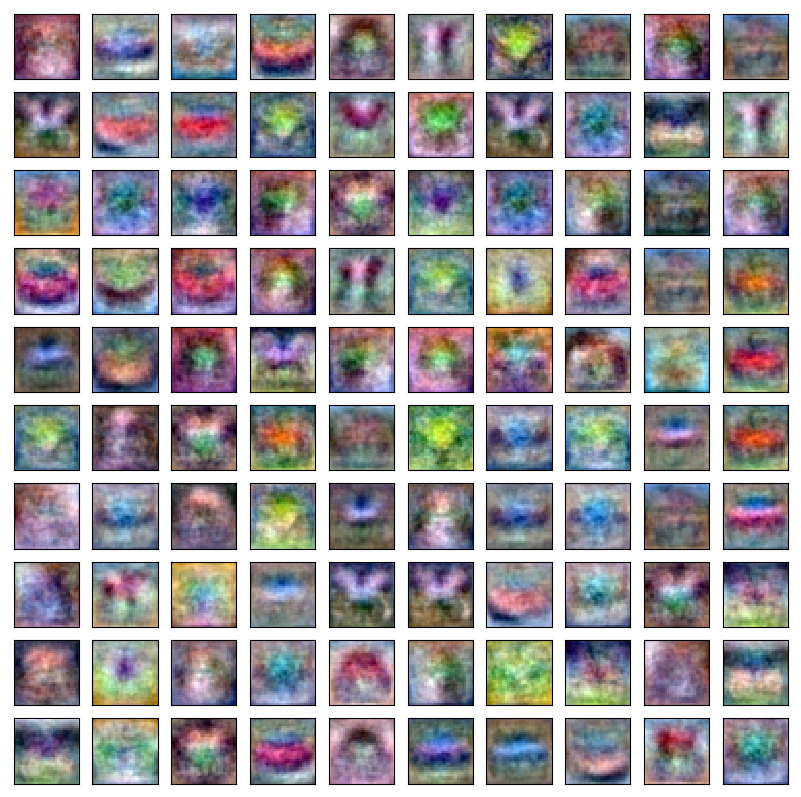

In [30]:
fc1Params = list(net2.fc1.parameters())
w = fc1Params[0].data.numpy()
print w.shape

f = vis_linear_weights(w)
f.savefig(os.path.join(expDir,'mlp-filter-2.png'), bbox_inches='tight')